<a href="https://colab.research.google.com/github/hayleypc/OR-Lookout_Fire/blob/Log-decomposition/HJA_cenmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/content/cenmet_233_a_5min_2023.csv',
                 skiprows=[0, 1, 3, 4],
                 low_memory=False)

In [17]:
print("Column names:")
print(df.columns.tolist()[:10])  # Show first 10 columns
print("\nFirst few rows:")
print(df.head())

Column names:
['Site', 'Date', 'LOGGERID', 'PROGID', 'BATTERY_INST_0_0_01', 'Flag_BATTERY_INST_0_0_01', 'AIRTEMP_MEAN_150_0_04', 'Flag_AIRTEMP_MEAN_150_0_04', 'DEWPT_MEAN_150_0_04', 'Flag_DEWPT_MEAN_150_0_04']

First few rows:
         Site                 Date  LOGGERID   PROGID  BATTERY_INST_0_0_01  \
0  CENMET_233  2022-10-01 00:05:00       233  38469.0                12.35   
1  CENMET_233  2022-10-01 00:10:00       233  38469.0                12.35   
2  CENMET_233  2022-10-01 00:15:00       233  38469.0                12.35   
3  CENMET_233  2022-10-01 00:20:00       233  38469.0                12.35   
4  CENMET_233  2022-10-01 00:25:00       233  38469.0                12.35   

  Flag_BATTERY_INST_0_0_01  AIRTEMP_MEAN_150_0_04 Flag_AIRTEMP_MEAN_150_0_04  \
0                      NaN                  13.97                        NaN   
1                      NaN                  14.00                        NaN   
2                      NaN                  13.88               

In [20]:
print("First 5 rows of Date column:")
print(df['Date'].head())
print(df['Date'].tail())
print("\nData types:")
print(df['Date'].dtype)

First 5 rows of Date column:
0   2022-10-01 00:05:00
1   2022-10-01 00:10:00
2   2022-10-01 00:15:00
3   2022-10-01 00:20:00
4   2022-10-01 00:25:00
Name: Date, dtype: datetime64[ns]
105115   2023-09-30 23:40:00
105116   2023-09-30 23:45:00
105117   2023-09-30 23:50:00
105118   2023-09-30 23:55:00
105119   2023-10-01 00:00:00
Name: Date, dtype: datetime64[ns]

Data types:
datetime64[ns]


In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

In [21]:
# Filter to your desired time period
start_date = '2023-07-01'
end_date = '2023-08-31'

df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

print(f"\nOriginal data: {len(df)} rows")
print(f"Filtered data: {len(df_filtered)} rows")
print(f"Date range: {df_filtered['Date'].min()} to {df_filtered['Date'].max()}")

# Save the filtered data
df_filtered.to_csv('/content/cenmet_filtered.csv', index=False)


Original data: 105120 rows
Filtered data: 17569 rows
Date range: 2023-07-01 00:00:00 to 2023-08-31 00:00:00


In [22]:
print(df_filtered.columns.tolist())

['Site', 'Date', 'LOGGERID', 'PROGID', 'BATTERY_INST_0_0_01', 'Flag_BATTERY_INST_0_0_01', 'AIRTEMP_MEAN_150_0_04', 'Flag_AIRTEMP_MEAN_150_0_04', 'DEWPT_MEAN_150_0_04', 'Flag_DEWPT_MEAN_150_0_04', 'AIRTEMP_MEAN_450_0_01', 'Flag_AIRTEMP_MEAN_450_0_01', 'DEWPT_MEAN_450_0_01', 'Flag_DEWPT_MEAN_450_0_01', 'AIRTEMP_MEAN_250_0_03', 'Flag_AIRTEMP_MEAN_250_0_03', 'AIRTEMP_MEAN_350_0_02', 'Flag_AIRTEMP_MEAN_350_0_02', 'AIRTEMP_MEAN_350_0_08', 'Flag_AIRTEMP_MEAN_350_0_08', 'AIRTEMP_MAX_150_0_04', 'Flag_AIRTEMP_MAX_150_0_04', 'DEWPT_MAX_150_0_04', 'Flag_DEWPT_MAX_150_0_04', 'AIRTEMP_MAX_450_0_01', 'Flag_AIRTEMP_MAX_450_0_01', 'DEWPT_MAX_450_0_01', 'Flag_DEWPT_MAX_450_0_01', 'AIRTEMP_MAX_250_0_03', 'Flag_AIRTEMP_MAX_250_0_03', 'AIRTEMP_MAX_350_0_02', 'Flag_AIRTEMP_MAX_350_0_02', 'AIRTEMP_MAX_350_0_08', 'Flag_AIRTEMP_MAX_350_0_08', 'AIRTEMP_MIN_150_0_04', 'Flag_AIRTEMP_MIN_150_0_04', 'DEWPT_MIN_150_0_04', 'Flag_DEWPT_MIN_150_0_04', 'AIRTEMP_MIN_450_0_01', 'Flag_AIRTEMP_MIN_450_0_01', 'DEWPT_MIN_450_

In [24]:
# Filter to August 16-24, 2023
start_date = '2023-08-16'
end_date = '2023-08-24 23:59:59'

df_wind = df_filtered[(df_filtered['Date'] >= start_date) & (df_filtered['Date'] <= end_date)]

# Select the specific columns you want
columns_to_display = [
    'Date',
    'RELHUM_MEAN_150_0_04',
    'AIRTEMP_MEAN_150_0_04',
    'WNDPRO_SPD_MEAN_1000_0_01',
    'WNDPRO_SPD_MAX_1000_0_01',
    'WNDPRO_DIR_MEAN_1000_0_01',
    'VPD_MEAN_150_0_04',
    'WNDSNC_SPD_MAX_1000_0_02'
]

df_table = df_wind[columns_to_display].copy()

# Display the table
print(f"Meteorological data from {df_wind['Date'].min()} to {df_wind['Date'].max()}")
print(f"Number of observations: {len(df_table)}")
print("\n")
print(df_table)

Meteorological data from 2023-08-16 00:00:00 to 2023-08-24 23:55:00
Number of observations: 2592


                     Date  RELHUM_MEAN_150_0_04  AIRTEMP_MEAN_150_0_04  \
91871 2023-08-16 00:00:00                 56.12                  21.12   
91872 2023-08-16 00:05:00                 55.19                  21.17   
91873 2023-08-16 00:10:00                 55.00                  21.12   
91874 2023-08-16 00:15:00                 55.07                  21.10   
91875 2023-08-16 00:20:00                 55.78                  20.99   
...                   ...                   ...                    ...   
94458 2023-08-24 23:35:00                   NaN                    NaN   
94459 2023-08-24 23:40:00                   NaN                    NaN   
94460 2023-08-24 23:45:00                   NaN                    NaN   
94461 2023-08-24 23:50:00                   NaN                    NaN   
94462 2023-08-24 23:55:00                   NaN                    NaN   

       WNDPR

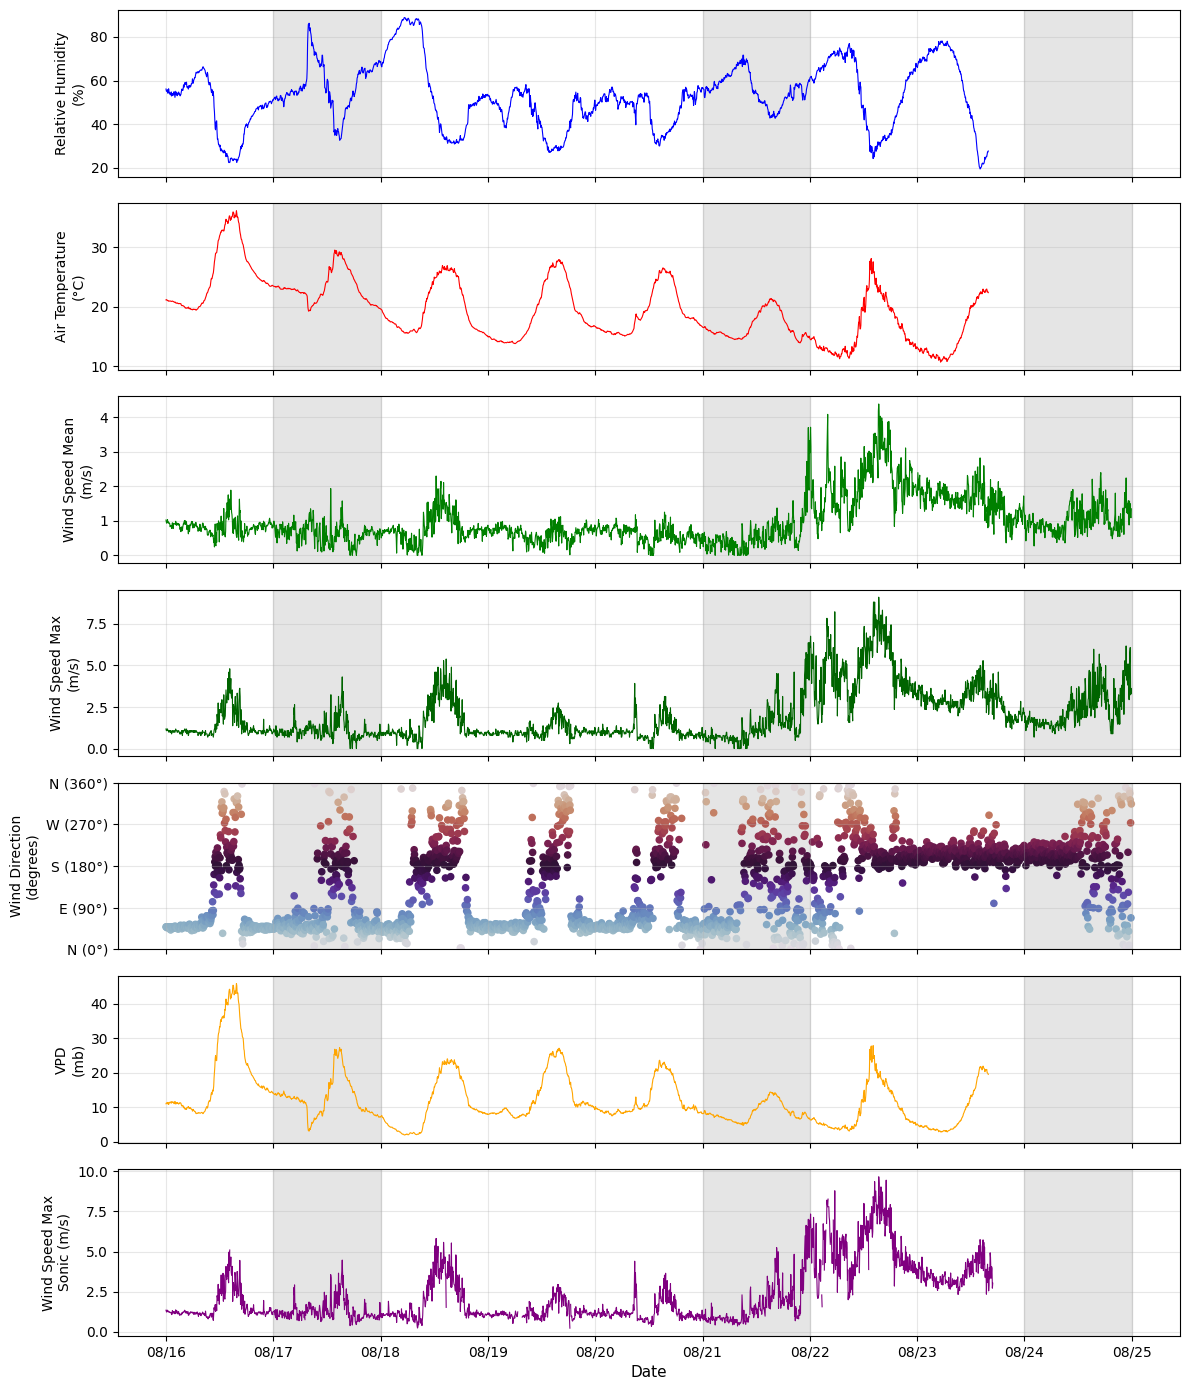

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

# Create figure with subplots
fig, axes = plt.subplots(7, 1, figsize=(12, 14), sharex=True)

# Define dates for vertical shading
shade_dates = ['2023-08-17', '2023-08-21', '2023-08-24']

# Plot each variable
# 1. Relative Humidity
axes[0].plot(df_table['Date'], df_table['RELHUM_MEAN_150_0_04'], color='blue', linewidth=0.8)
axes[0].set_ylabel('Relative Humidity\n(%)', fontsize=10)
axes[0].grid(alpha=0.3)

# 2. Air Temperature
axes[1].plot(df_table['Date'], df_table['AIRTEMP_MEAN_150_0_04'], color='red', linewidth=0.8)
axes[1].set_ylabel('Air Temperature\n(°C)', fontsize=10)
axes[1].grid(alpha=0.3)

# 3. Wind Speed Mean
axes[2].plot(df_table['Date'], df_table['WNDPRO_SPD_MEAN_1000_0_01'], color='green', linewidth=0.8)
axes[2].set_ylabel('Wind Speed Mean\n(m/s)', fontsize=10)
axes[2].grid(alpha=0.3)

# 4. Wind Speed Max
axes[3].plot(df_table['Date'], df_table['WNDPRO_SPD_MAX_1000_0_01'], color='darkgreen', linewidth=0.8)
axes[3].set_ylabel('Wind Speed Max\n(m/s)', fontsize=10)
axes[3].grid(alpha=0.3)

# 5. Wind Direction - use scatter plot with circular colormap (no colorbar)
wind_dir = df_table['WNDPRO_DIR_MEAN_1000_0_01'].dropna()
dates_with_wind = df_table.loc[wind_dir.index, 'Date']
axes[4].scatter(dates_with_wind, wind_dir, c=wind_dir,
                cmap='twilight', s=20, vmin=0, vmax=360)
axes[4].set_ylabel('Wind Direction\n(degrees)', fontsize=10)
axes[4].set_ylim(0, 360)
axes[4].set_yticks([0, 90, 180, 270, 360])
axes[4].set_yticklabels(['N (0°)', 'E (90°)', 'S (180°)', 'W (270°)', 'N (360°)'])
axes[4].grid(alpha=0.3)

# 6. VPD
axes[5].plot(df_table['Date'], df_table['VPD_MEAN_150_0_04'], color='orange', linewidth=0.8)
axes[5].set_ylabel('VPD\n(mb)', fontsize=10)
axes[5].grid(alpha=0.3)

# 7. Wind Speed Max (Sonic)
axes[6].plot(df_table['Date'], df_table['WNDSNC_SPD_MAX_1000_0_02'], color='purple', linewidth=0.8)
axes[6].set_ylabel('Wind Speed Max\nSonic (m/s)', fontsize=10)
axes[6].set_xlabel('Date', fontsize=11)
axes[6].grid(alpha=0.3)

# Add vertical shading for specified dates
for date_str in shade_dates:
    date = pd.to_datetime(date_str)
    for ax in axes:
        ax.axvspan(date, date + pd.Timedelta(days=1), alpha=0.2, color='gray', zorder=0)

# Format x-axis to show only dates (no time)
axes[6].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axes[6].xaxis.set_major_locator(mdates.DayLocator())

plt.tight_layout()
plt.show()

Wind Statistics Comparison:
      Date  Wind Speed Mean (avg)  Wind Speed Mean (std)  Wind Speed Max (avg)  Wind Speed Max (max)  Wind Direction (circular mean)  Wind Direction (mode bin)
2023-08-17                   0.63                   0.29                  1.12                  4.31                            59.3                         45
2023-08-21                   0.57                   0.49                  1.39                  6.37                            79.9                         45
2023-08-24                   1.02                   0.38                  2.41                  6.17                           205.8                        180


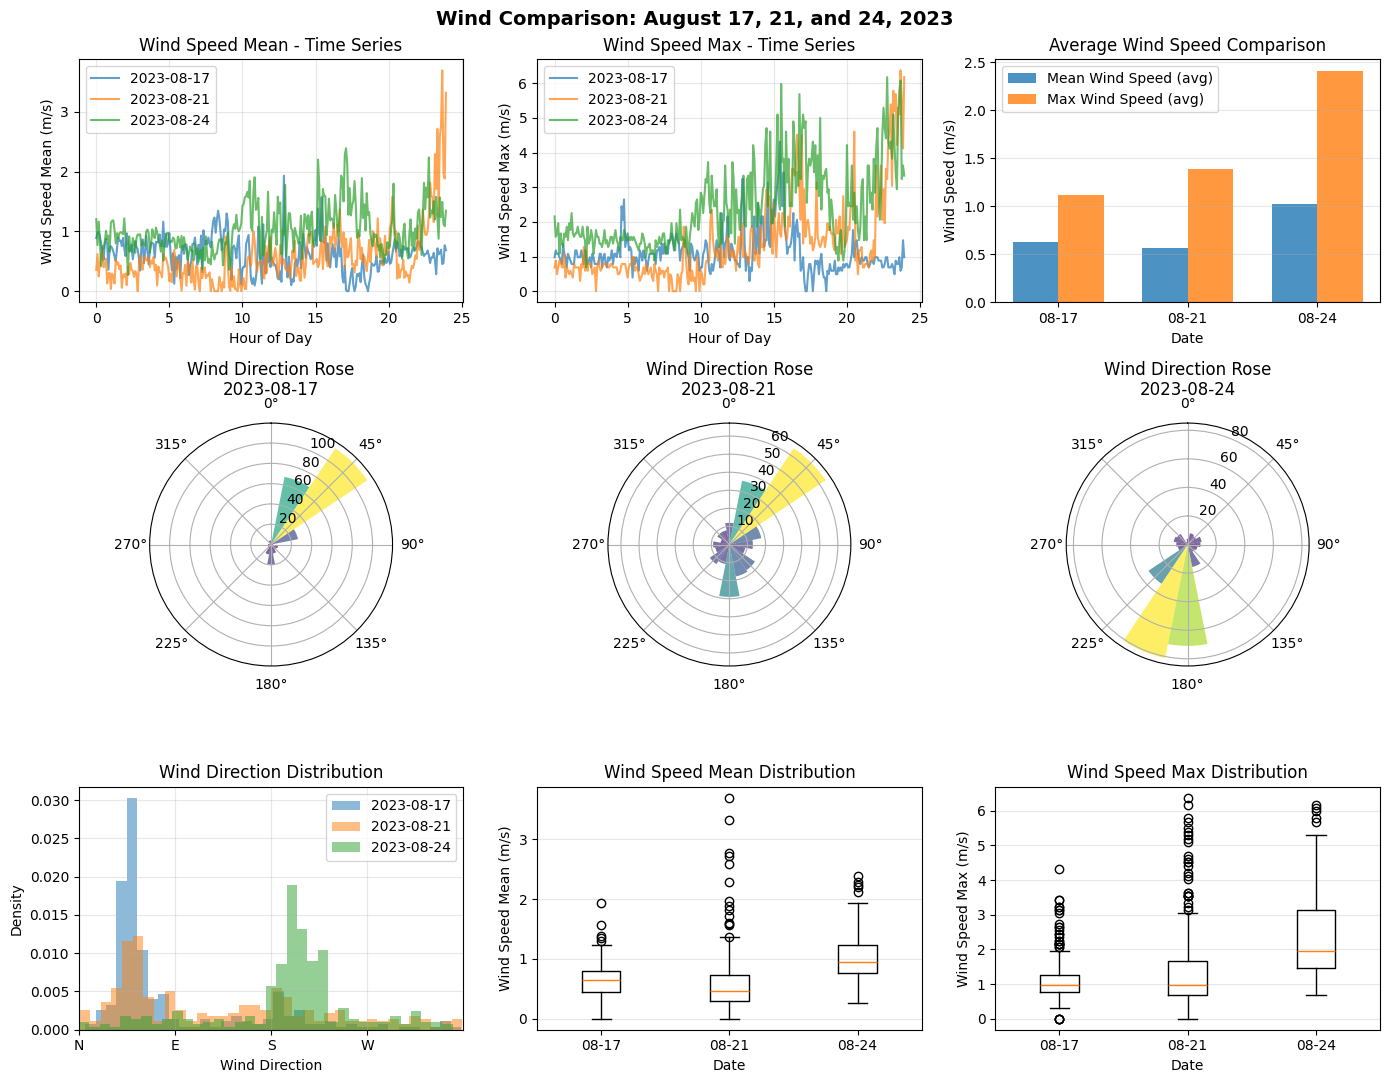

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# First, we need to get data for all three dates from the original filtered dataset
comparison_dates = ['2023-08-17', '2023-08-21', '2023-08-24']

# Extract data for each date
date_data = {}
for date_str in comparison_dates:
    date = pd.to_datetime(date_str)
    mask = (df_filtered['Date'] >= date) & (df_filtered['Date'] < date + pd.Timedelta(days=1))
    date_data[date_str] = df_filtered[mask].copy()

# Create summary statistics table
summary_stats = []
for date_str in comparison_dates:
    data = date_data[date_str]

    # Wind speed statistics
    wspd_mean_avg = data['WNDPRO_SPD_MEAN_1000_0_01'].mean()
    wspd_mean_std = data['WNDPRO_SPD_MEAN_1000_0_01'].std()
    wspd_max_avg = data['WNDPRO_SPD_MAX_1000_0_01'].mean()
    wspd_max_max = data['WNDPRO_SPD_MAX_1000_0_01'].max()

    # Wind direction mode (most common direction)
    wind_dir = data['WNDPRO_DIR_MEAN_1000_0_01'].dropna()
    if len(wind_dir) > 0:
        # Bin directions into 8 cardinal directions for mode calculation
        bins = np.arange(0, 361, 45)
        binned_dir = np.digitize(wind_dir, bins)
        mode_result = stats.mode(binned_dir, keepdims=True)
        mode_bin = mode_result.mode[0]
        mode_direction = bins[mode_bin - 1] if mode_bin > 0 else 0

        # Calculate circular mean (better for wind direction)
        wind_dir_rad = np.deg2rad(wind_dir)
        mean_sin = np.sin(wind_dir_rad).mean()
        mean_cos = np.cos(wind_dir_rad).mean()
        circular_mean = np.rad2deg(np.arctan2(mean_sin, mean_cos)) % 360
    else:
        mode_direction = np.nan
        circular_mean = np.nan

    summary_stats.append({
        'Date': date_str,
        'Wind Speed Mean (avg)': round(wspd_mean_avg, 2),
        'Wind Speed Mean (std)': round(wspd_mean_std, 2),
        'Wind Speed Max (avg)': round(wspd_max_avg, 2),
        'Wind Speed Max (max)': round(wspd_max_max, 2),
        'Wind Direction (circular mean)': round(circular_mean, 1),
        'Wind Direction (mode bin)': round(mode_direction, 1)
    })

summary_df = pd.DataFrame(summary_stats)
print("Wind Statistics Comparison:")
print(summary_df.to_string(index=False))

# Create visualization with adjusted spacing
fig = plt.figure(figsize=(14, 11))

# 1. Wind Speed Mean comparison
ax1 = plt.subplot(3, 3, 1)
for date_str in comparison_dates:
    data = date_data[date_str]
    ax1.plot(data['Date'].dt.hour + data['Date'].dt.minute/60,
             data['WNDPRO_SPD_MEAN_1000_0_01'],
             label=date_str, linewidth=1.5, alpha=0.7)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Wind Speed Mean (m/s)')
ax1.set_title('Wind Speed Mean - Time Series')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Wind Speed Max comparison
ax2 = plt.subplot(3, 3, 2)
for date_str in comparison_dates:
    data = date_data[date_str]
    ax2.plot(data['Date'].dt.hour + data['Date'].dt.minute/60,
             data['WNDPRO_SPD_MAX_1000_0_01'],
             label=date_str, linewidth=1.5, alpha=0.7)
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Wind Speed Max (m/s)')
ax2.set_title('Wind Speed Max - Time Series')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Bar chart comparison of average wind speeds
ax3 = plt.subplot(3, 3, 3)
x = np.arange(len(comparison_dates))
width = 0.35
means = [summary_df.loc[i, 'Wind Speed Mean (avg)'] for i in range(len(comparison_dates))]
maxes = [summary_df.loc[i, 'Wind Speed Max (avg)'] for i in range(len(comparison_dates))]
ax3.bar(x - width/2, means, width, label='Mean Wind Speed (avg)', alpha=0.8)
ax3.bar(x + width/2, maxes, width, label='Max Wind Speed (avg)', alpha=0.8)
ax3.set_xlabel('Date')
ax3.set_ylabel('Wind Speed (m/s)')
ax3.set_title('Average Wind Speed Comparison')
ax3.set_xticks(x)
ax3.set_xticklabels([d[5:] for d in comparison_dates])
ax3.legend()
ax3.grid(alpha=0.3, axis='y')

# 4-6. Wind direction rose plots (polar plots) with adjusted title positioning
for idx, date_str in enumerate(comparison_dates):
    ax = plt.subplot(3, 3, 4 + idx, projection='polar')
    data = date_data[date_str]
    wind_dir = data['WNDPRO_DIR_MEAN_1000_0_01'].dropna()

    if len(wind_dir) > 0:
        # Create histogram for rose plot
        bins = np.arange(0, 361, 22.5)  # 16 directions
        hist, bin_edges = np.histogram(wind_dir, bins=bins)

        # Convert to radians and plot
        theta = np.deg2rad(bin_edges[:-1])
        width = np.deg2rad(22.5)
        bars = ax.bar(theta, hist, width=width, bottom=0, alpha=0.7)

        # Color bars by frequency
        colors = plt.cm.viridis(hist / hist.max())
        for bar, color in zip(bars, colors):
            bar.set_facecolor(color)

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_title(f'Wind Direction Rose\n{date_str}', pad=20)  # Added pad parameter

# 7. Wind direction histogram comparison
ax7 = plt.subplot(3, 3, 7)
for date_str in comparison_dates:
    data = date_data[date_str]
    wind_dir = data['WNDPRO_DIR_MEAN_1000_0_01'].dropna()
    if len(wind_dir) > 0:
        ax7.hist(wind_dir, bins=36, alpha=0.5, label=date_str, density=True)
ax7.set_xlabel('Wind Direction')
ax7.set_ylabel('Density')
ax7.set_title('Wind Direction Distribution')
ax7.set_xlim(0, 360)
ax7.set_xticks([0, 90, 180, 270])
ax7.set_xticklabels(['N', 'E', 'S', 'W'])
ax7.legend()
ax7.grid(alpha=0.3)

# 8. Box plot for wind speed mean
ax8 = plt.subplot(3, 3, 8)
wspd_data = [date_data[date]['WNDPRO_SPD_MEAN_1000_0_01'].dropna() for date in comparison_dates]
ax8.boxplot(wspd_data, tick_labels=[d[5:] for d in comparison_dates])
ax8.set_xlabel('Date')
ax8.set_ylabel('Wind Speed Mean (m/s)')
ax8.set_title('Wind Speed Mean Distribution')
ax8.grid(alpha=0.3, axis='y')

# 9. Box plot for wind speed max
ax9 = plt.subplot(3, 3, 9)
wspd_max_data = [date_data[date]['WNDPRO_SPD_MAX_1000_0_01'].dropna() for date in comparison_dates]
ax9.boxplot(wspd_max_data, tick_labels=[d[5:] for d in comparison_dates])
ax9.set_xlabel('Date')
ax9.set_ylabel('Wind Speed Max (m/s)')
ax9.set_title('Wind Speed Max Distribution')
ax9.grid(alpha=0.3, axis='y')

plt.suptitle('Wind Comparison: August 17, 21, and 24, 2023', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

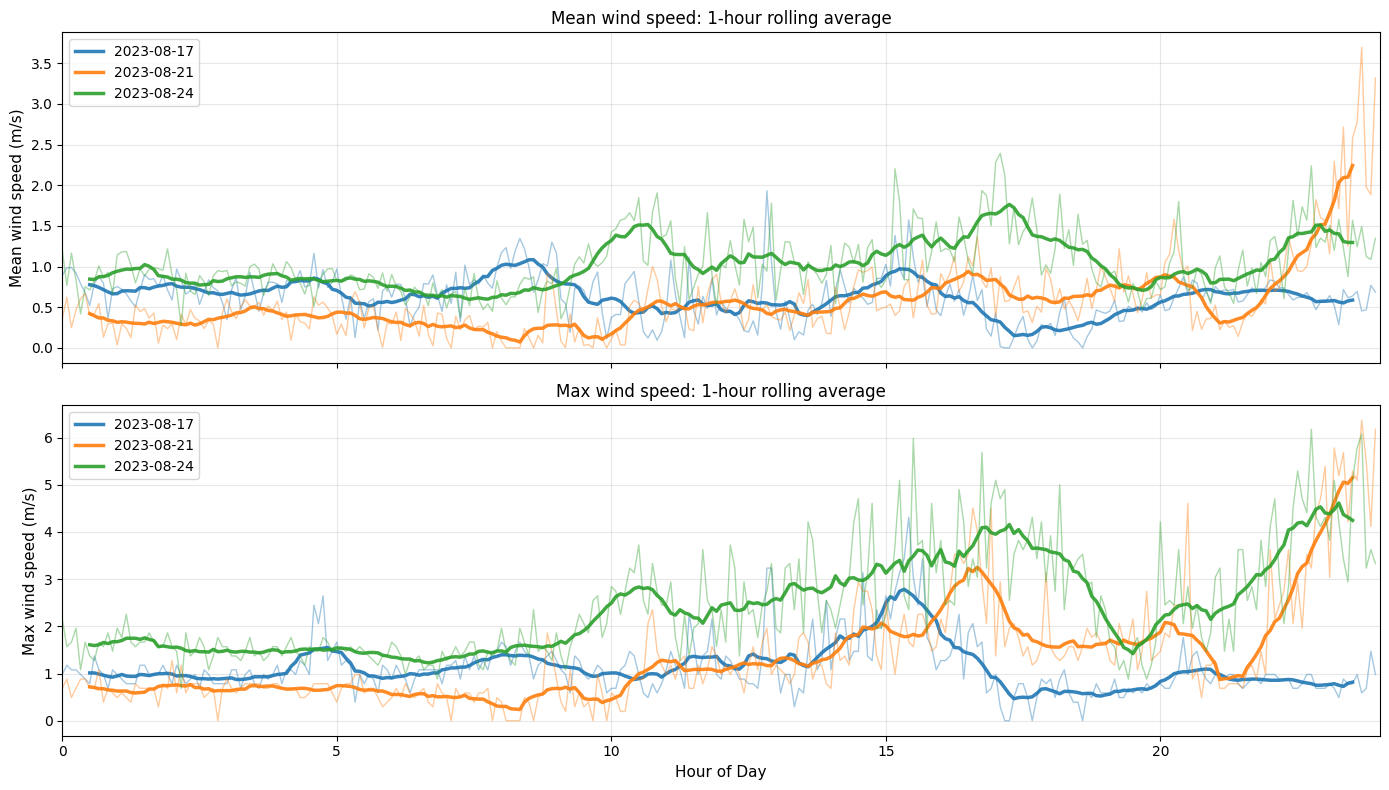

In [39]:
# Create separate figure for wind speed time series with rolling averages
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Define rolling window (12 observations = 1 hour for 5-minute data)
window = 12

# Define colors for each date
colors = ['C0', 'C1', 'C2']  # matplotlib default color cycle

# 1. Wind Speed Mean with rolling average
for idx, date_str in enumerate(comparison_dates):
    data = date_data[date_str].copy()
    # Calculate rolling average
    data['wspd_mean_rolling'] = data['WNDPRO_SPD_MEAN_1000_0_01'].rolling(window=window, center=True).mean()

    # Plot raw data (no label)
    ax1.plot(data['Date'].dt.hour + data['Date'].dt.minute/60,
             data['WNDPRO_SPD_MEAN_1000_0_01'],
             linewidth=1, alpha=0.4, color=colors[idx])
    # Plot rolling average with label
    ax1.plot(data['Date'].dt.hour + data['Date'].dt.minute/60,
             data['wspd_mean_rolling'],
             label=f'{date_str}', linewidth=2.5, alpha=0.9, color=colors[idx])

ax1.set_xlim(0, 24)
ax1.set_ylabel('Mean wind speed (m/s)', fontsize=11)
ax1.set_title('Mean wind speed: 1-hour rolling average', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Wind Speed Max with rolling average
for idx, date_str in enumerate(comparison_dates):
    data = date_data[date_str].copy()
    # Calculate rolling average
    data['wspd_max_rolling'] = data['WNDPRO_SPD_MAX_1000_0_01'].rolling(window=window, center=True).mean()

    # Plot raw data (no label)
    ax2.plot(data['Date'].dt.hour + data['Date'].dt.minute/60,
             data['WNDPRO_SPD_MAX_1000_0_01'],
             linewidth=1, alpha=0.4, color=colors[idx])
    # Plot rolling average with label
    ax2.plot(data['Date'].dt.hour + data['Date'].dt.minute/60,
             data['wspd_max_rolling'],
             label=f'{date_str}', linewidth=2.5, alpha=0.9, color=colors[idx])

ax2.set_xlim(0, 24)
ax2.set_xlabel('Hour of Day', fontsize=11)
ax2.set_ylabel('Max wind speed (m/s)', fontsize=11)
ax2.set_title('Max wind speed: 1-hour rolling average', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()